In [80]:
import tables
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.time import Time
import Ska.engarchive.fetch_eng as fetch
from Ska.Matplotlib import plot_cxctime
from Ska.Numpy import interpolate
%matplotlib inline

In [106]:
h5 = tables.openFile('aimpoint/aimpoint_asol_values.h5')
adat = h5.root.data[:]
h5.close()

In [126]:
asol = Table(adat)
asol = asol[asol['time'] > Time('2008:001').cxcsec]
asol['dy'] *= 20
asol['dz'] *= 20
asol.colnames

['obsid', 'time', 'dy', 'dz', 'dtheta']

In [127]:
acht = fetch.Msid('aach1t', stat='5min', start='2008:001')

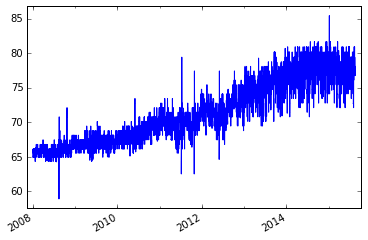

In [128]:
acht.plot()

In [129]:
len(asol)

188407

In [130]:
aok = asol[::10]

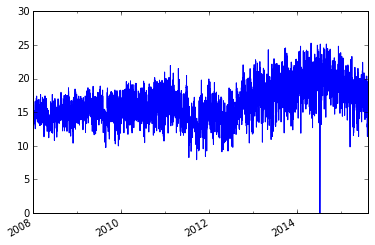

In [131]:
plot_cxctime(aok['time'], aok['dz']);

In [132]:
def plot_aimpoint_aca_temp(axis, scale, start='2011:200', stop=None):
    t0 = Time('2013:001').cxcsec
    t1 = Time('2013:100').cxcsec
    ok = (asol['time'] > t0) & (asol['time'] < t1)
    offset = np.median(asol[axis][ok])

    tstart = Time(start).cxcsec
    tstop = Time.now().cxcsec if (stop is None) else Time(stop).cxcsec

    ok = (asol['time'] > tstart) & (asol['time'] < tstop)
    aok = asol[ok]
    plt.figure(figsize=(12, 6))
    plot_cxctime(aok['time'], aok[axis], 'b-')
    
    model = Table([acht.times, acht.vals], names=('time', 'raw_y'))
    ok = (model['time'] > t0) & (model['time'] < t1)
    y0 = np.mean(model['raw_y'][ok])
    model['y'] = scale * (model['raw_y'] - y0) + offset
    ok = (model['time'] > tstart) & (model['time'] < tstop)
    mok = model[ok]
    plot_cxctime(mok['time'], mok['y'], 'r-', alpha=0.5)
    plt.grid()
    plt.ylabel('Drift (arcsec)')
    plt.title('Aimpoint drift compared to scaled ACA housing temperature')
    
    y_interp = interpolate(mok['y'], mok['time'], aok['time'], method='linear', sorted=True)
    dy = aok[axis] - y_interp
    plot_cxctime(aok['time'], dy, 'g-')

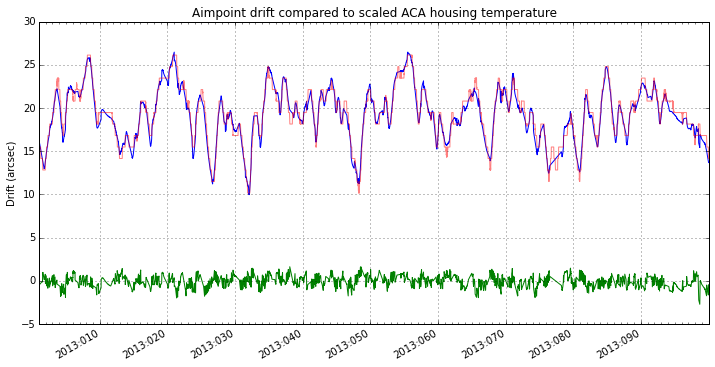

In [133]:
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2013:001', stop='2013:100')

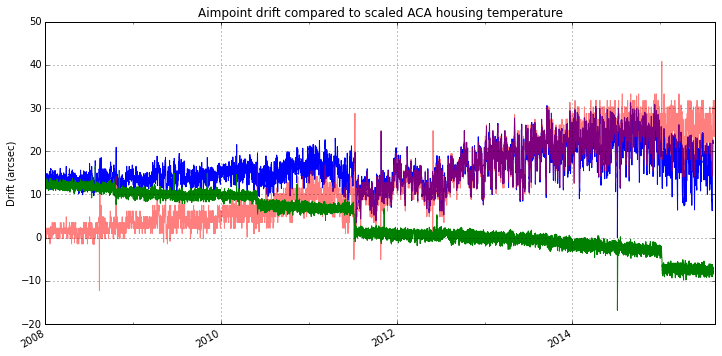

In [135]:
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2008:001')

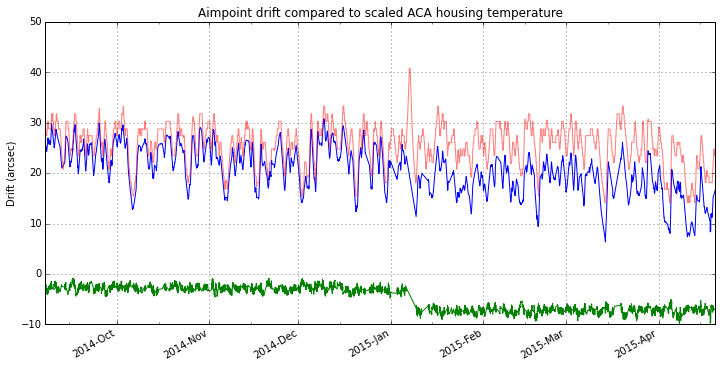

In [137]:
# 2015:006 IU reset
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2014:250', stop='2015:110')

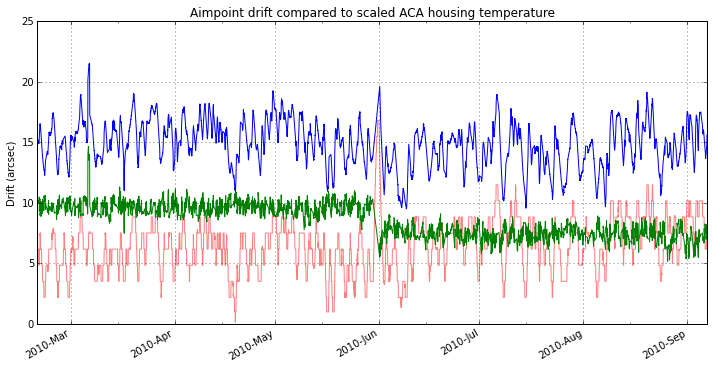

In [138]:
# 2010:149 IU reset
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2010:050', stop='2010:250')